# Plots for sample 22_peru
## reference is 19_peru

# plot coverage by positions in trimmed and untrimmed 

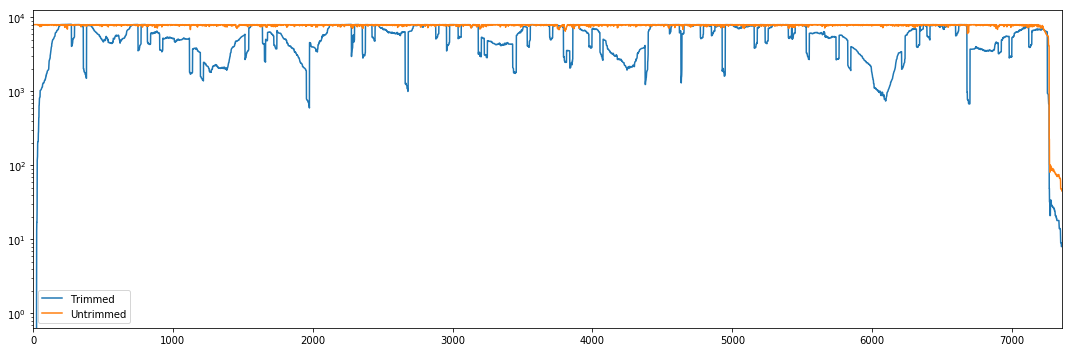

In [19]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/SP088X/22_peru/depth")
import pandas as pd 
import matplotlib.pyplot as plt
df_trimmed = pd.read_csv("22_peru.trimmed.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos","depth_tr"])
df_untrimmed = pd.read_csv("22_peru.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos","depth_untr"])
ax = df_trimmed["depth_tr"].plot(logy=True, label = "Trimmed", figsize = (15,5))
df_untrimmed["depth_untr"].plot(logy=True, ax = ax, label ="Untrimmed")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
# remove reads from mismatched primers
# and plot

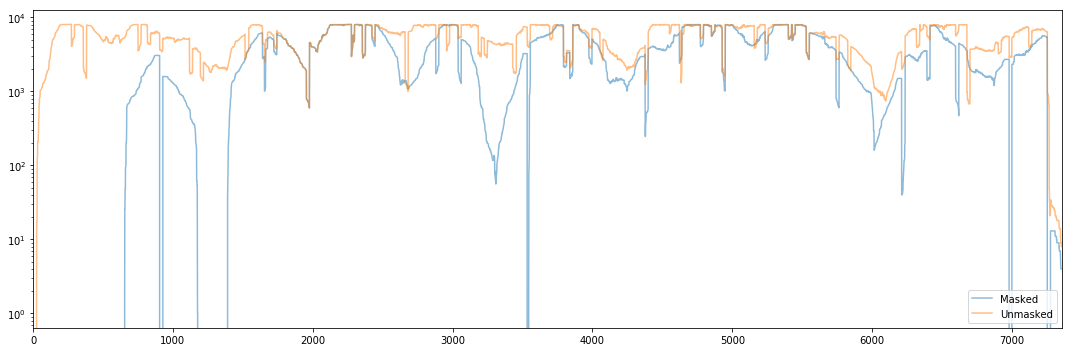

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df_unmasked = pd.read_csv("22_peru.trimmed.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos", "depth_unmask"])
df_masked = pd.read_csv("22_peru.bad_are_masked.sorted.depth", sep = "\t", names = ["Ref", "Pos", "depth_mask"])

ax = df_masked["depth_mask"].plot(logy=True, label = "Masked", figsize = (15,5), alpha = 0.5)
df_unmasked["depth_unmask"].plot(logy=True, ax = ax, label ="Unmasked", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


show position of called variants

In [22]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/SP088X/22_peru/")
import pandas as pd
import matplotlib.pyplot as plt
rep_a = pd.read_csv("22_peru_final.tsv", sep="\t")
rep_a.head()

,REGION,POS,REF,ALT,REF_DP,REF_RV,REF_QUAL,ALT_DP,ALT_RV,ALT_QUAL,ALT_FREQ,TOTAL_DP,PVAL,PASS
0,Consensus_19_peru.consensus_threshold_0_qualit...,767,A,G,1239,1239,38,41,41,29,0.032031,1280,5.968710e-05,True
1,Consensus_19_peru.consensus_threshold_0_qualit...,3242,C,T,197,0,36,15,0,36,0.070755,212,2.046310e-05,True
2,Consensus_19_peru.consensus_threshold_0_qualit...,3443,C,T,744,744,36,106,106,35,0.124706,850,1.485360e-37,True
3,Consensus_19_peru.consensus_threshold_0_qualit...,4571,G,A,3876,2824,39,401,395,38,0.093757,4277,2.445810e-123,True
4,Consensus_19_peru.consensus_threshold_0_qualit...,5177,T,C,4306,3191,38,165,156,37,0.036904,4471,4.257890e-48,True


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
rep_a = pd.read_csv("22_peru_final.tsv", sep="\t")
rep_a.head()
# df[(df['coverage']  > 50) & (df['reports'] < 4)]
#rep_a=rep_a[(rep_a['ALT_FREQ'] > 0.5) & (rep_a['TOTAL_DP'] >400)]
rep_a= rep_a[rep_a['TOTAL_DP'] > 400]
shape = rep_a.shape 
print(shape) # after filtering low coverage 
print("there are 6  iSNPs")

(6, 14)
there are 6  iSNPs


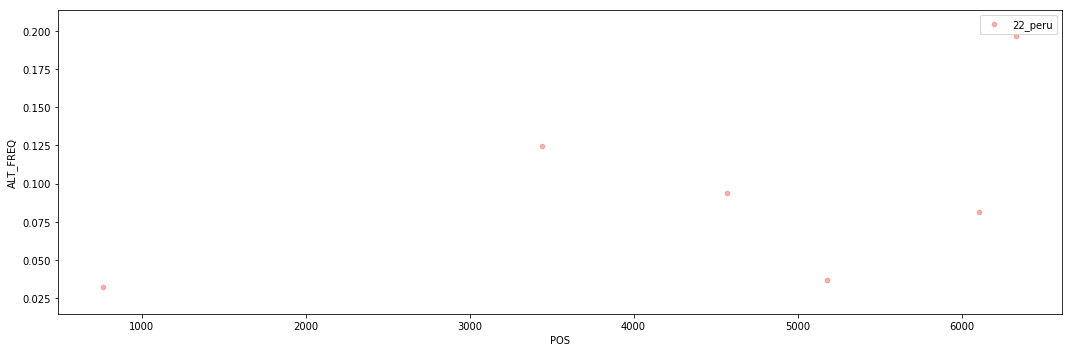

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
rep_a = pd.read_csv("22_peru_final.tsv", sep="\t")
rep_b= rep_a[rep_a['TOTAL_DP'] > 400]
f, ax = plt.subplots(figsize=(15,5))
rep_b.plot(x="POS", y="ALT_FREQ", label="22_peru", ax =ax, kind="scatter", color="red", alpha = 0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# let us filter snps in polymerase region [3600-5099]
print("snps in polymerase")
print((rep_b[(rep_b['POS'] > 3610) & (rep_b['POS'] < 5099)]).shape)
# let us filter snps in complete capsid[5010-6800]
print("snps in capsid")
print((rep_b[(rep_b['POS'] > 5100) & (rep_b['POS'] < 7350)]).shape)

snps in polymerase
(1, 14)
snps in capsid
(3, 14)


In [26]:
# what percentage of this masked genome (without reads from mismached primers) has depth >400
import pandas as pd
import numpy as np
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/SP088X/22_peru/depth")
df_masked = pd.read_csv("22_peru.bad_are_masked.sorted.depth", sep = "\t", names = ["Ref", "Pos", "depth_mask"])
df_masked['400cov'] = np.where(df_masked['depth_mask']>=400, 'yes', 'no')
df_masked['100cov'] = np.where(df_masked['depth_mask']>=100, 'yes', 'no')
df_masked.head()

,Ref,Pos,depth_mask,400cov,100cov
0,Consensus_19_peru.consensus_threshold_0_qualit...,1,0,no,no
1,Consensus_19_peru.consensus_threshold_0_qualit...,2,0,no,no
2,Consensus_19_peru.consensus_threshold_0_qualit...,3,0,no,no
3,Consensus_19_peru.consensus_threshold_0_qualit...,4,0,no,no
4,Consensus_19_peru.consensus_threshold_0_qualit...,5,0,no,no


In [27]:
# What proportion of the genome is has a depth of coverage of at least <100 reads, 100-399, >400 (Breadth ofcoverage)
my_tab1 = pd.crosstab(index=df_masked["100cov"],  # Make a crosstab
                              columns="Breadth >= 100coverage")      # Name the count column
my_tab2 = pd.crosstab(index=df_masked["400cov"],  # Make a crosstab
                              columns="Beadth above 400coverage")      # Name the count column
shape=df_masked.shape
print(shape)
print(my_tab1); print(my_tab2)

(7359, 5)
col_0   Breadth >= 100coverage
100cov                        
no                        1081
yes                       6278
col_0   Beadth above 400coverage
400cov                          
no                          1333
yes                         6026


In [28]:
6026/7359 * 100 # proportion of genome covered >400

81.88612583231418

In [29]:
6278/7359 * 100 # proportion of genome covered >100

85.31050414458487